In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# WINSORIZATION/ WINSORIZING
# Percentile method with capping

In [4]:
dfstd=pd.read_csv(r'C:\Users\User\Downloads\placements.csv')

In [5]:
dfstd

,score,exam_marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [6]:
dfstd.head()

,score,exam_marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [7]:
dfstd.columns

Index(['score', 'exam_marks', 'selected'], dtype='object')

In [8]:
dfstd.columns=['score','marks','selected']

In [9]:
dfstd

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [10]:
dfstd['marks']

0      26
1      38
2      40
3       8
4      17
       ..
995    44
996    65
997    34
998    46
999    10
Name: marks, Length: 1000, dtype: int64

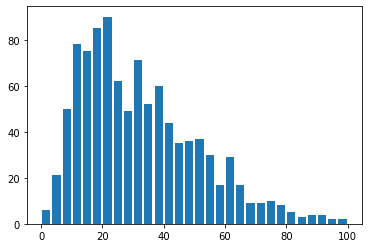

In [12]:
plt.hist(dfstd['marks'],bins=30,rwidth=0.8)
plt.show()

In [13]:
lower=dfstd['marks'].quantile(0.10)

In [14]:
lower

10.0

In [15]:
upper=dfstd['marks'].quantile(0.90)

In [16]:
upper

60.0

In [19]:
dfstd[dfstd['marks']<lower]

,score,marks,selected
3,6.42,8,1
11,6.38,7,1
26,7.45,8,1
34,8.15,9,0
37,8.51,9,1
...,...,...,...
941,7.18,8,0
942,7.03,6,0
943,7.36,2,0
961,7.65,9,0


In [20]:
dfstd[dfstd['marks']<lower].shape

(77, 3)

In [21]:
dfstd[dfstd['marks']>upper]

,score,marks,selected
9,7.75,94,1
40,6.60,86,1
42,7.46,71,1
43,7.85,63,0
61,7.51,86,0
...,...,...,...
947,6.49,70,0
966,6.24,72,1
987,6.77,62,0
994,6.48,63,0


In [22]:
dfstd[dfstd['marks']>upper].shape

(94, 3)

In [23]:
dfstd[(dfstd['marks']<lower)|(dfstd['marks']>upper)]

,score,marks,selected
3,6.42,8,1
9,7.75,94,1
11,6.38,7,1
26,7.45,8,1
34,8.15,9,0
...,...,...,...
963,6.74,8,0
966,6.24,72,1
987,6.77,62,0
994,6.48,63,0


## Trimming the outliers

In [24]:
dfstd1=dfstd[(dfstd['marks']>lower)&(dfstd['marks']<upper)]

In [25]:
dfstd1

,score,marks,selected
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
4,7.23,17,0
5,7.30,23,1
...,...,...,...
992,6.26,12,0
993,6.73,21,1
995,8.87,44,1
997,4.89,34,0


In [26]:
dfstd.shape

(1000, 3)

In [27]:
dfstd1.shape

(795, 3)

## Capping the outliers

In [31]:
dfstd[(dfstd['marks']<lower)|(dfstd['marks']>upper)]

,score,marks,selected
3,6.42,8,1
9,7.75,94,1
11,6.38,7,1
26,7.45,8,1
34,8.15,9,0
...,...,...,...
963,6.74,8,0
966,6.24,72,1
987,6.77,62,0
994,6.48,63,0


In [32]:
dfstd['marks']=dfstd['marks'].apply(lambda x:lower if x<lower else(upper if x> upper else x))

In [33]:
dfstd

,score,marks,selected
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,10.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,60.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [34]:
dfstd[(dfstd['marks']<lower)|(dfstd['marks']>upper)]

,score,marks,selected
